<a href="https://colab.research.google.com/github/ivy3150/Optimal-Solutions-for-Spill-Incidents/blob/main/Optimal_Solutions_for_Spill_Incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Team 1**
Ryan Dibiase,<br>
Jiaxin Wu,<br>
Megan Joseph,<br>
Ping-Hsuan Chiang,<br>
Ting-Yun Cheng<br>

**Project Introduction:**<br>

We apply our skills in data analysis and the brute-force algorithm to address a real-world problem in the area of sustainability. More precisely, a data set made available by Connecticut’s Department of Energy and Environmental Protection (CT DEEP). This up-to-date data set contains the list of releases of substances to the environment, generally through accidental spills, starting from July.<br>

Dataset Source: [CT DEEP](https://data.ct.gov/Environment-and-Natural-Resources/Spill-Incidents/wr2a-rnsg) <br>

**Project Goals:**<br>
(1) Understand the data: what are the interesting facts and insights you can extract from this data set? <br>
(2) Crew Scheduling: given a set of cities, how would you distribute service crews among these cities to address the incidents (and therefore reduce their environmental impact) as quickly as possible?

# Part 1: Data Analysis
In this part, we started by reading and cleaning the assigned dataset, and then do the same for our external dataset. After the initial cleansing, we merge both dataset and tell some stories about what we see in the merged dataset. 

## Read the assigned dataset 

In [37]:
# import packages
# use pandas to read json file as the original dataset is too big to download it to our laptops

import pandas as pd
df=pd.read_json('https://data.ct.gov/resource/wr2a-rnsg.json')

# Select the columns for our analysis
trim = df.iloc[:,[4,5,12,13]]
trim.head()

,releasedatetime,townrelease,releasesubstance,quangallons
0,2022-01-19T20:30:00.000,Glastonbury,Contents of (1) radiator,3.00
1,2022-01-19T17:45:00.000,Hartford,Transformer Oil -- non-detectable PCBs,50.00
2,2022-01-19T17:50:00.000,Canton,Motor Oil,3.00
3,2022-01-19T16:20:00.000,Torrington,#2 Fuel,50.00
4,2022-01-19T00:00:00.000,Windham,antifreeze,2.00


In [38]:
# Check for null values and datatype
# As there are just a few null values, we'll drop them 
trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   releasedatetime   999 non-null    object
 1   townrelease       998 non-null    object
 2   releasesubstance  996 non-null    object
 3   quangallons       996 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


## Data Preprocessing for the assigned dataset
In this session, we check null value and decide if changing the data type of some columns is necessary. 

In [39]:
# Drop null values
trim_spill = trim.dropna()
# check how's the non_null counts after drpping null and check data types. 
trim_spill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   releasedatetime   991 non-null    object
 1   townrelease       991 non-null    object
 2   releasesubstance  991 non-null    object
 3   quangallons       991 non-null    object
dtypes: object(4)
memory usage: 38.7+ KB


In [40]:
# Clean column "quangallons" and make it numeric so that we can do further analysis.
# Since quangallons is object type with ',', we extract only the numbers from the syntax. 
# The defined function will extract only the numbers from both sides of the ',' and combine them together

import re
def find_number(text):
  num = re.findall(r'[0-9]+',text)
  return ".".join(num)

# We create a new column to store our transformed quangallons
trim_spill['quangallons'] = trim_spill['quangallons'].apply(lambda x: find_number(x))
trim_spill['quangallons']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0       3.00
1      50.00
2       3.00
3      50.00
4       2.00
       ...  
995     3.00
996     0.00
997     2.00
998    10.00
999     2.00
Name: quangallons, Length: 991, dtype: object

In [41]:
# We convert the new quangallons column into float type
trim_spill['quangallons'] = trim_spill['quangallons'].astype(float)

# Check if the data type is correct
trim_spill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   releasedatetime   991 non-null    object 
 1   townrelease       991 non-null    object 
 2   releasesubstance  991 non-null    object 
 3   quangallons       991 non-null    float64
dtypes: float64(1), object(3)
memory usage: 38.7+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
# check the shape of the dataset
print(trim_spill.shape)

(991, 4)


## Read external dataset

------------ <br>
This dataset is showing the amount of underground storage tanks in Connecticut. We chose this external dataset to compare the amount of underground tanks and spills and examine if there was any correlation in the data sets. We display the comparisons in some of the graphs below. <br>
---------------<br>

Source: [Underground Storage Tanks (USTs) - Facility and Tank Details](https://data.ct.gov/Environment-and-Natural-Resources/Underground-Storage-Tanks-USTs-Facility-and-Tank-D/utni-rddb)

In [43]:
# Read the external dataset 
# import packages
# use pandas to read json file as the original dataset is too big to download it to our laptops

import pandas as pd
df1=pd.read_json('https://data.ct.gov/resource/utni-rddb.json')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   agencyfacilityid       1000 non-null   object 
 1   facilitynm             1000 non-null   object 
 2   facilityaddr           1000 non-null   object 
 3   facilitycity           1000 non-null   object 
 4   facilityzip            999 non-null    float64
 5   agencytankid           1000 non-null   object 
 6   tankstatuscd           1000 non-null   object 
 7   capacitygalsnum        1000 non-null   int64  
 8   substancecd            951 non-null    object 
 9   tanklastuseddt         673 non-null    object 
 10  closuretypecd          785 non-null    object 
 11  tankconstructioncd     957 non-null    object 
 12  tankmodsdesc           315 non-null    object 
 13  pipeconstructioncd     852 non-null    object 
 14  pipemoddesc            357 non-null    object 
 15  insta

In [44]:
# Keep columns that are useful for our stroy.
# Columns include: 'site city', 'status of tank', 'estimated total capacity(gallons)', and 'substance currently stored'
trim2 = df1.iloc[:,[3,6,7,8]]
trim2.head()

,facilitycity,tankstatuscd,capacitygalsnum,substancecd
0,ESSEX,Permanently Closed,4000,Gasoline
1,OLD SAYBROOK,Permanently Closed,10000,Diesel
2,BRISTOL,Permanently Closed,1000,Used Oil
3,NAUGATUCK,Permanently Closed,2000,Gasoline
4,SIMSBURY,Permanently Closed,8000,Gasoline


In [45]:
# Check missing values
trim2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilitycity     1000 non-null   object
 1   tankstatuscd     1000 non-null   object
 2   capacitygalsnum  1000 non-null   int64 
 3   substancecd      951 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


## Data preprocessing for external data
We did the same for the external data as stated above for the assigned dataset. We dropped null values, assessed changing data types, and dropped unnecessary columns for comparison. 

In [46]:
# Drop null values
trim2_final = trim2.dropna()
trim2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilitycity     951 non-null    object
 1   tankstatuscd     951 non-null    object
 2   capacitygalsnum  951 non-null    int64 
 3   substancecd      951 non-null    object
dtypes: int64(1), object(3)
memory usage: 37.1+ KB


In [47]:
# eliminate "Permanently Closed" tanks as we want to find the relationship between functional tank and spill incidents
# User "not equal" (!=) to filter our data
trim_tank = trim2_final[trim2_final.tankstatuscd != 'Permanently Closed']
# trim_tank.info()
trim_tank.head(5)

,facilitycity,tankstatuscd,capacitygalsnum,substancecd
9,HARTFORD,Currently In Use,10000,Gasoline
22,WETHERSFIELD,Currently In Use,6000,Diesel
23,BRIDGEPORT,Currently In Use,5000,Gasoline
26,HARTFORD,Currently In Use,6000,Gasoline
31,WATERTOWN,Currently In Use,10000,E-15


## Merge original dataset with external dataset
We decided to merge the two datasets using the common columns from each dataset. 

In [48]:
# Merge the two datasets, joined on their town name
# choosing the two columns of town names that are similar, 
# this is where we merge both of the dataframes to become one cohesive data set 
df = trim_spill.merge(trim_tank, left_on='townrelease', right_on='facilitycity')
# check what the merged data set looks like
df.head(10)

,releasedatetime,townrelease,releasesubstance,quangallons,facilitycity,tankstatuscd,capacitygalsnum,substancecd
0,2022-01-19T17:45:00.000,Hartford,Transformer Oil -- non-detectable PCBs,50.0,Hartford,Currently In Use,10000,Gasoline
1,2022-01-13T00:00:00.000,Hartford,Unknown,0.0,Hartford,Currently In Use,10000,Gasoline
2,2022-01-04T00:00:00.000,Hartford,HYDRAULIC OIL,5.0,Hartford,Currently In Use,10000,Gasoline
3,2022-01-01T00:00:00.000,Hartford,ANTIFREEZE,2.0,Hartford,Currently In Use,10000,Gasoline
4,2021-12-28T00:00:00.000,Hartford,motor oil,0.0,Hartford,Currently In Use,10000,Gasoline
5,2021-12-22T00:00:00.000,Hartford,#2 FUEL OIL,5.0,Hartford,Currently In Use,10000,Gasoline
6,2021-12-22T00:00:00.000,Hartford,MOTOR VEHICLE FLUIDS,0.0,Hartford,Currently In Use,10000,Gasoline
7,2021-12-21T00:00:00.000,Hartford,hydraulic oil,20.0,Hartford,Currently In Use,10000,Gasoline
8,2021-12-21T00:00:00.000,Hartford,TRANSFORMER OIL,1.0,Hartford,Currently In Use,10000,Gasoline
9,2021-12-18T00:00:00.000,Hartford,GASOLINE & ENGINE FLUIDS,0.0,Hartford,Currently In Use,10000,Gasoline


In [49]:
# check the shape of the merged data set
df.shape

(444, 8)

In [50]:
# For releasedatetime column, as we want to know if there is any specific year/month have the highest incidents, 
# we get rid of time element, keep only date format

import datetime

# create a function to creates a datetime object, and return only date info
def convertDate(d):
     new_date = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%f")
     return new_date.date()

# Apply above function to the whole datetime column
df['releasedatetime'] = df['releasedatetime'].apply(convertDate)
df['releasedatetime']

df['releasedatetime'] = pd.to_datetime(df['releasedatetime'])
df['releasedatetime']

0     2022-01-19
1     2022-01-13
2     2022-01-04
3     2022-01-01
4     2021-12-28
         ...    
439   2021-11-27
440   2021-11-27
441   2021-11-27
442   2021-11-27
443   2021-11-18
Name: releasedatetime, Length: 444, dtype: datetime64[ns]

In [51]:
# check the date format
df.head()

,releasedatetime,townrelease,releasesubstance,quangallons,facilitycity,tankstatuscd,capacitygalsnum,substancecd
0,2022-01-19,Hartford,Transformer Oil -- non-detectable PCBs,50.0,Hartford,Currently In Use,10000,Gasoline
1,2022-01-13,Hartford,Unknown,0.0,Hartford,Currently In Use,10000,Gasoline
2,2022-01-04,Hartford,HYDRAULIC OIL,5.0,Hartford,Currently In Use,10000,Gasoline
3,2022-01-01,Hartford,ANTIFREEZE,2.0,Hartford,Currently In Use,10000,Gasoline
4,2021-12-28,Hartford,motor oil,0.0,Hartford,Currently In Use,10000,Gasoline


In [52]:
# Check dataset details - numerical data
# quangallons is seriously skewed
df.describe()

,quangallons,capacitygalsnum
count,444.000000,444.000000
mean,7.474662,9475.337838
std,21.956922,5335.542997
min,0.000000,500.000000
25%,0.000000,6000.000000
50%,2.000000,8000.000000
75%,3.000000,12000.000000
max,150.000000,30000.000000


## Visualization for the merged dataset
We visualize the distributions of numerical data by drawing histograms. 

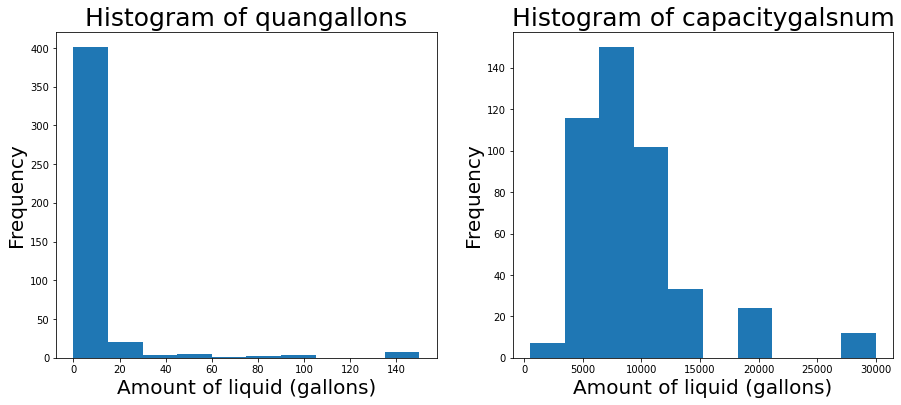

In [53]:
# import package
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,6)

# make subplots - We need 1x2 figures
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Specifiy the features of interest - Define titles, xaxes, and yaxes
features = ['quangallons', 'capacitygalsnum']
titles = ['Histogram of quangallons', 'Histogram of capacitygalsnum']
xaxes = ['Amount of liquid (gallons)', 'Amount of liquid (gallons)']
yaxes = ['Frequency', 'Frequency']

# draw histograms
# loop over the axes
# The reason for [idx] is to loop each in sequence, otherwise is a total value
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[features[idx]],bins=10)
    ax.set_title(titles[idx], fontsize=25)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=10)

In [54]:
# Check dataset details - categorical data

df.describe(include=['O'])

,townrelease,releasesubstance,facilitycity,tankstatuscd,substancecd
count,444,444,444,444,444
unique,26,75,26,2,6
top,Enfield,ANTIFREEZE,Enfield,Currently In Use,Gasoline
freq,92,124,92,439,244


## Interesting Plots
For data visualization, we specifically select 5 interesting plots.

### Plot 1
First, we made a bar chart of each spill incident by town. This is a simple graphical method to allow us to visualize the data set.

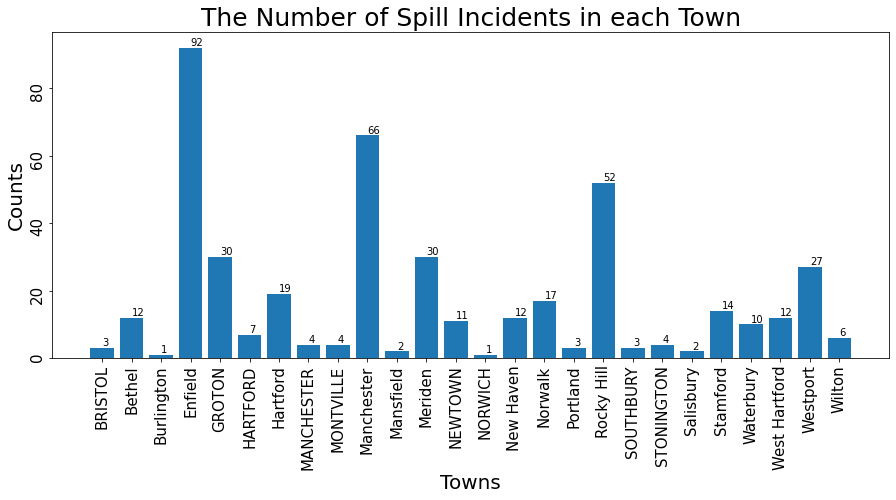

In [55]:
# Visualize the distribution of categorical data - The Number of Spill Incidents in each Town in this dataset
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,6)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

# make the data read to feed into the visulizer
# groupby town, and see how many town report spill
X_townrelease = df.groupby('townrelease').size().reset_index(name='Town')['townrelease']
Y_townrelease = df.groupby('townrelease').size().reset_index(name='Counts')['Counts']

# Make the bar plot -- lower left axes
axes.bar(X_townrelease, Y_townrelease)
axes.set_title('The Number of Spill Incidents in each Town', fontsize=25)
axes.set_xlabel('Towns', fontsize=20)
axes.set_ylabel('Counts', fontsize=20)
axes.tick_params(axis='both', labelsize=15, rotation=90)

# add datapoints
for i in range(len(Y_townrelease)):
  plt.text(i, Y_townrelease[i],Y_townrelease[i],va='bottom')
plt.show()

**Plot 1 Notes**

* Enfiled and Manchester are leading towns in spill count. This result is unexpected since neither are within the top 10 for population in the state.
* Further graphs should use gallons spilled rather than count to try and resolve this anecdotal descripency.

**Conclusion**: 
From this plot we can see that Enfiled has the highest spill incident counts and Manchester has the second highest spill incident counts. We can clearly see that each town in Connecticut has different number of spill incidents and we can compare the numbers according to this plot. 

**Business Value**: 
This plot gives an overview of which town has the most spill incidents and where has comparetively less spill incidents, so the related service company can arrange their staff accordingly to those towns. 

### Plot 2.1
We created a bar chart with spill gallons instead of count, to see which spills might have been more significant. If the spill is larger than the amount of spills in each town, this may affect the correlation between the two datasets. 

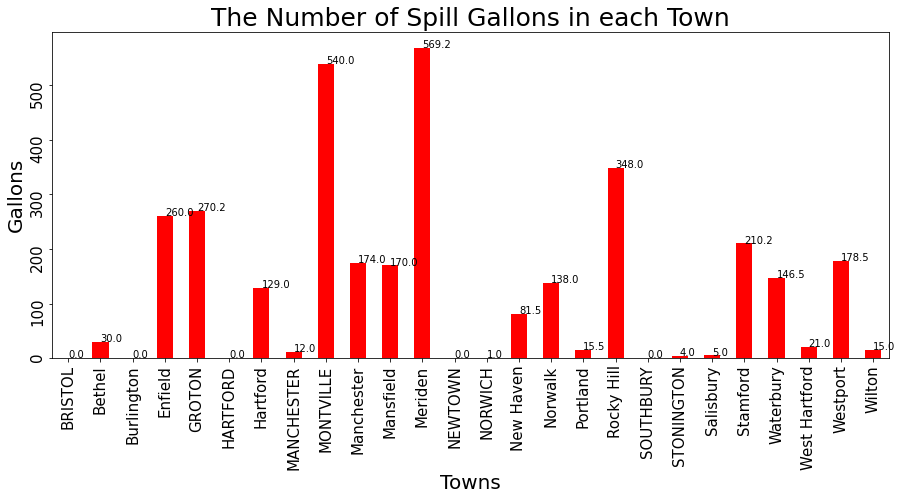

In [56]:
# Check the amount of quangallons spill in each city in this dataset
# perform groupby - sum all the quangallons in each city.
# plot bar chart with titles, names, headers

town_spill = df.groupby(['townrelease'])['quangallons'].sum().plot(kind='bar', color='red')
plt.title('The Number of Spill Gallons in each Town', fontsize=25)
plt.xlabel('Towns', fontsize=20)
plt.ylabel('Gallons', fontsize=20)
plt.tick_params(axis='both', labelsize=15, rotation=90)
town_spill

# add datapoints
plotData = df.groupby(['townrelease'])['quangallons'].sum()
for i in range(len(plotData)):
  plt.text(i, plotData[i], round(plotData[i],1))

plt.show()

**Plot 2.1 Notes** 

* Plot 2.1 shows a major outlier in gallons in Hartford
* Despite being towards the bottom in spill count, Hartford is orders of magnitude above the rest of the state in gallons spilled
* Next step is to verify outliers and eliminate them

### Plot 2.2
Plot 2.1 showed an outlier in gallons in Hartford.
Despite being towards the bottom in spill count, Hartford contains the most gallons spilled of substance. Indicating this may have been an isolated one-time spill. 
Next step is to verify outliers and eliminate them, we did this using a box plot. 

Text(0.5, 1.0, 'Identifying Outliers for Spill Gallons')

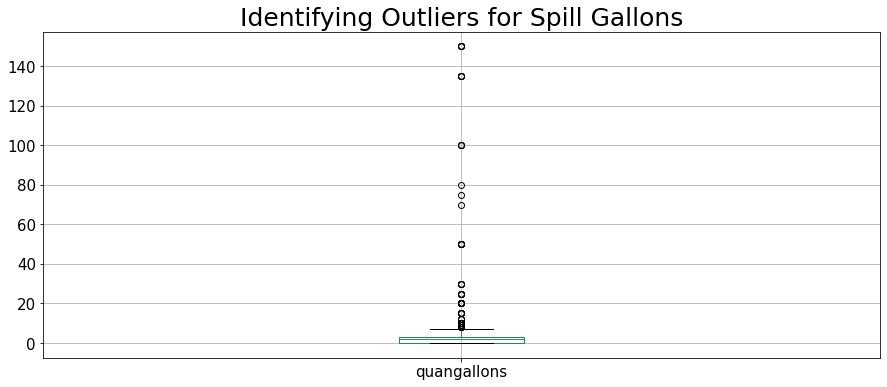

In [57]:
# To search for outliers based on the above bar chart in original data set of spill incidents in gallons use box plot
# Create box plot to visualize
df.boxplot(column=['quangallons'],fontsize=15)
plt.title('Identifying Outliers for Spill Gallons', fontsize=25)

**Plot 2.2 Notes**

* Plot clearly shows outliers skewing the data set
* Next step is to eliminate outliers and observe change in data set

**Conclusion**: 
From Plot 2.1, we can see that Hartford has the highest total amount of spill gallons. However, the chart is barely displaying the total amounts in the other towns. By using the box plot (Plot 2.2) to show the distribution of spill gallons, we noticed that there is an outlier making the total amount of spill gallons in Hartford much higher compared to the total amounts in the other towns. We will address the problem in Plot 3.

### Plot 3
We removed outliers identified above in Plots 2.1 and 2.2 by eliminating any data outside the 25th to 75th quantiles. Plot Spill Gallons vs. Underground Tank Gallons to see if any correlation exists. 

Text(0, 0.5, 'Tank Capacity Gallons')

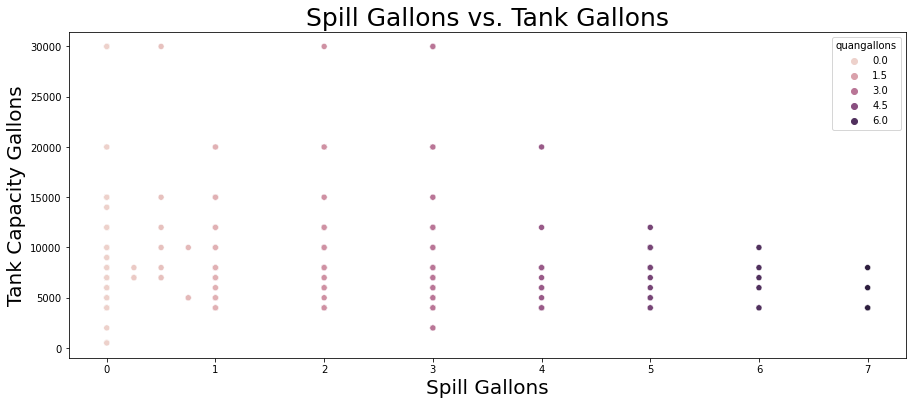

In [58]:
import numpy as np
from pylab import *
import seaborn as sns

# To remove outliers in Spill gallons(quangallons), we are focusing on the values of spill gallons in the 25th to 75th percentiles.
Q1 = df['quangallons'].quantile(0.25) 
Q3 = df['quangallons'].quantile(0.75) 
iqr = Q3-Q1
minimum = Q1-1.5*iqr
maximum = Q3+1.5*iqr
df =df[(df['quangallons'] <=maximum) & (df['quangallons']>=minimum)]
# eliminate the large outliers of quangallons since they seriously skew the data
# create scatterplot to examine the correlation between Spill Gallons and Tank Gallons 
# add title and headers  
sns.scatterplot(data=df, x="quangallons", y="capacitygalsnum", hue="quangallons")
plt.title('Spill Gallons vs. Tank Gallons', fontsize=25)
plt.xlabel('Spill Gallons', fontsize=20)
plt.ylabel('Tank Capacity Gallons', fontsize=20)

**Plot 3 Notes**

* Dataset is more clear with outliers removed
* No correlation observed between town underground tank capacity and spill volume
* Next check substance vs substance for both data sets to see if there is a more localized correlation for this data set

**Conclusion**: 
With the outliers removed, the data is less skewed and easier to observe. 
Based on the scatter plot graphed, we can see there is no correlation between the amount of underground tank gallons and spill gallons. Meaning, if there is a larger amount of underground tanks in a town, it does not indicate that more spills will occur. 
We can view from the scatter plot that a majority number of spill incidents remain relatively low, as bunched in the lower left corner of the plot. 

### Plot 4
We decided to do a similar plot for the external dataset, just seen in Plot 2.1. We wanted to visualize the number of underground tank gallons in each town to really see if the towns correlated based on count. 

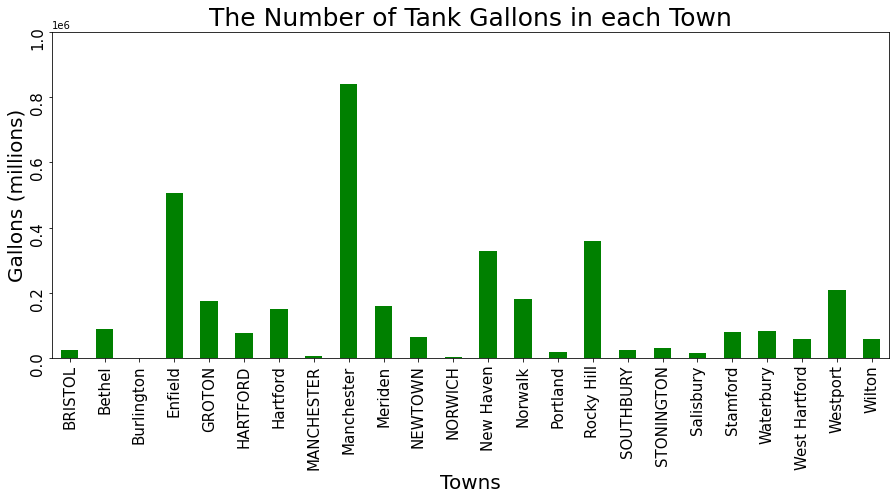

In [59]:
# Check the amount of Tank Gallons(capacitygalsnum) in each city in this dataset
# perform groupby
# plot bar chart
# add titles and labels to plot
tank_capacity = df.groupby(['facilitycity'])['capacitygalsnum'].sum().plot(kind='bar', color='green')
plt.title('The Number of Tank Gallons in each Town', fontsize=25)
plt.xlabel('Towns', fontsize=20)
plt.ylabel('Gallons (millions)', fontsize=20)
plt.tick_params(axis='both', labelsize=15, rotation=90)
plt.ylim((0,1000000))
tank_capacity

**Plot 4 Notes**

* Enfield, Manchester, and Westport show high underground tank volume which aligns with the first spill count data set
* Shows that it is necesicary to look for correlation between the two data sets

**Conclusion**: 
Plot 4 showed us that Enfield, while not the highest, does have a larger amount of underground tank gallons. This is related to the count of spill gallons, Enfield had a higher incidence of spill gallons than most of the other towns. While we did not see direct correlation in the scatter plot, this could bring us to some assumptions while looking at count plots. 

### Plot 5
We created a histogram to view if there was any correlation to substances spilled to substance stored in underground tanks. 

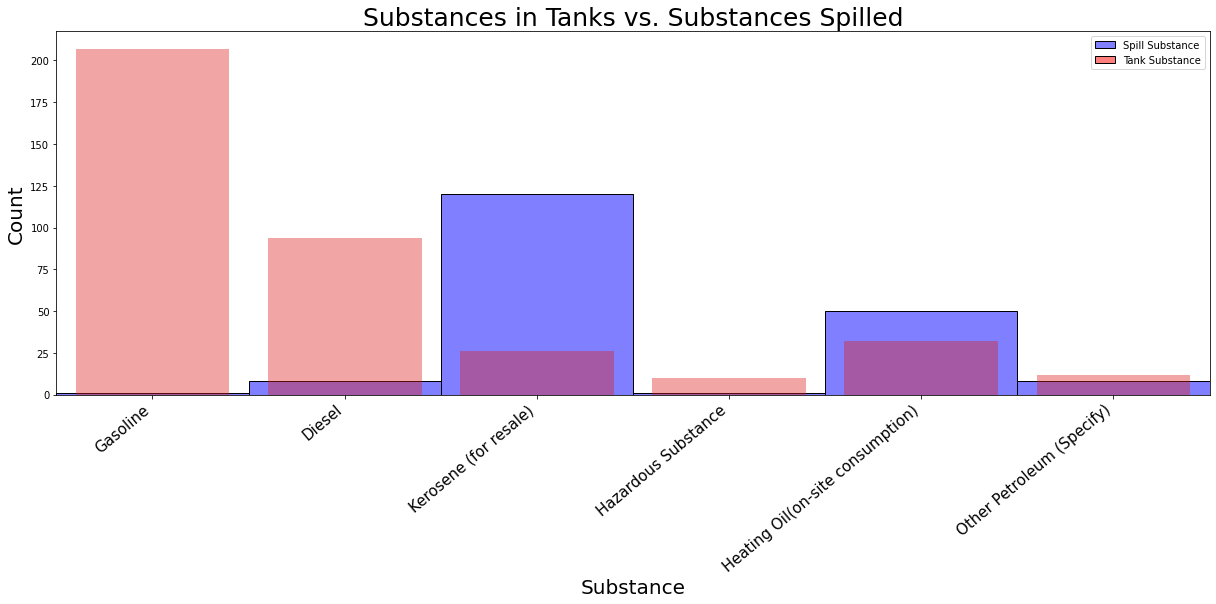

In [60]:
import numpy as np
from pylab import *
import seaborn as sns

plt.figure(figsize=(17,8.5)) # this creates a figure 20 inch wide, 8.5 inch high
# create histogram to view relationship, if any, with substance in tanks compared to substance that spill
sns.histplot(data=df, x='releasesubstance', color="blue", label="Spill Substance",alpha=0.5) 
sns.histplot(data=df, x='substancecd', color="red", label="Tank Substance",alpha=0.5) 

ax = sns.countplot(x='substancecd', data=df, color="red",alpha=0.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=15)
# only use the common substance between the original dataset and external dataset
# this only contains 6 substances for comparison since there are only 6 substances identified in tanks on external dataset.
# add titles, headers, and legend to histogram
plt.title('Substances in Tanks vs. Substances Spilled', fontsize=25)
plt.xlabel('Substance', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

**Plot 5 Notes**
* Plot shows graphs of spill gallons by substance and tank gallons by substance overlaid
* Data indicates that spill and tank substance are unrelated
* Possible negative correlation between the two data sets

**Conclusion**: 
The histogram displayed that there are six common substances between the two datasets. In red, the underground tank substance is displayed and in blue the spill substance is displayed, as per the legend on plot. 

In the histogram, we see that Gasoline and Diesel are the majority substances stored in underground tanks, while they remain low in spill substance incidents. The histogram shows us that Hazardous substance and Other petroleum are the substances primarily spilled. These vague substance descriptions could indicate the many different type of motor fuels listed as substance in the assigned dataset. 

# Part 2: Creating Optimal Models

## Data preprocessing 
Our optimization modeling part only focuses on three cities in Connecticut - Norwal, Stamford, Enfiled. We are going to read the original dataset from the connecticut government website and subset a dataset to have the 'townrelease' is equal to Stamford, Norwalk, or Enfield. 

Before building the models, we need to only select the data we need by creating new dataframes, check any missing values, and convert the data type of 'quangallons' from object to float. 

###Step 1: Select the cities we were assigned (Norwalk, Stamford, and Enfield)

In [61]:
# The cities we were assigned are Norwalk, Stamford, and Enfield
# Created three new dataframes for each city we were assigned by reuseing dataframe 'trim_spill' from Part 1
# When there is no define for '.head()', the default number of rows equals to 5.
three = ['Norwalk','Stamford','Enfield']
cityN = trim_spill[trim_spill["townrelease"] == three[0]]
cityS = trim_spill[trim_spill["townrelease"] == three[1]]
cityE = trim_spill[trim_spill["townrelease"] == three[2]]
# check how Norwalk data looks like
cityN.head()

,releasedatetime,townrelease,releasesubstance,quangallons
114,2022-01-12T00:00:00.000,Norwalk,#2 FUEL OIL,0.0
148,2022-01-10T00:00:00.000,Norwalk,#2 FUEL OIL,3.0
187,2022-01-06T14:13:00.000,Norwalk,#2 Fuel - 275 gallon AST,50.0
270,2021-12-30T00:00:00.000,Norwalk,#2 FUEL OIL,0.0
277,2021-12-30T00:00:00.000,Norwalk,#2 FUEL OIL,0.0


In [62]:
# check how Stamford data looks like
cityS.head()

,releasedatetime,townrelease,releasesubstance,quangallons
15,2022-01-19T00:00:00.000,Stamford,HYDRAULIC OIL,3.00
18,2022-01-18T21:45:00.000,Stamford,#2 Fuel - 330 gallon AST,100.00
182,2022-01-05T13:30:00.000,Stamford,#2 FUEL OIL,0.25
193,2022-01-05T00:00:00.000,Stamford,#2 fuel oil,75.00
220,2022-01-04T00:00:00.000,Stamford,#2 FUEL OIL,0.00


In [63]:
# check how Enfield data looks like
cityE.head()

,releasedatetime,townrelease,releasesubstance,quangallons
10,2022-01-19T12:29:00.000,Enfield,Contents of (1) radiator and (1) battery,4.0
72,2022-01-15T14:50:00.000,Enfield,GASOLINE,0.0
127,2022-01-11T00:00:00.000,Enfield,ANTIFREEZE,2.0
132,2022-01-11T00:00:00.000,Enfield,ANTIFREEZE,5.0
141,2022-01-10T00:00:00.000,Enfield,MOTOR OIL,3.0


### Step 2: Merge the 3 new dataframes into one

In [64]:
# Merge the target rows into one dataset
# Check the shape of the data to make sure the number of total rows and column are correct
threecity = pd.concat([cityN,cityS,cityE])
threecity.shape

(54, 4)

In [65]:
# make sure the datatype of 'quangallons' is float
threecity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 114 to 831
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   releasedatetime   54 non-null     object 
 1   townrelease       54 non-null     object 
 2   releasesubstance  54 non-null     object 
 3   quangallons       54 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.1+ KB


## Creating Optimization Models by using Brute-Force method <br>

**Objective**

(1) Identify an assignment of crews to cities that minimizes the sum of the repair times.<br>
(2) Identify an assignment of crews to cities that minimizes the maximum repair time among all cities in C.<br>

**Constraints** 

Here are the constraints for our Optimization Model. <br>
(1) The number of crews available is ten, and each crew can only be assigned to one city.<br>
(2) For each city, we must assign at least one crew. 

Subject to:<br>
* Each city must be assigned at least one crew: <br>
* N = Norwalk, S = Stamford, and E = Enfield
  - `N, S, E >= 1`
  - `N + S + E >= 3` <br>
* Total only ten crew: `N + S + E <= 10`
* The amount of the spill (quangallons) from three cities are: `gN+gS+gE = total_quangallons`
* Repair time for Norwalk:     `R1 = gN / N`
* Repair time for Stamford:    `R2 = gS / S`
* Repair time for Enfield:     `R3 = gE/E`

Objective function for two models:

* Model 1 - minimizes the sum of the repair times in all cities
  - `Min (R) = R1 + R2 + R3`
* Model 2 - minimizes the maximum repair time among all cities in C
  - `Min (Z) = max(R1,R2,R3)`



### Create Model 1:

To minimize the sum of the repair times: <br>
Min(R) = R1 + R2 + R3

In [66]:
# Create dictionaries
# Find and sum up the amount of spill in each city respectively.
gallon = {
      "Total gallons Norwalk" : sum(threecity[threecity["townrelease"] == 'Norwalk']['quangallons']),
      "Total gallons Enfield" : sum(threecity[threecity["townrelease"] == 'Enfield']['quangallons']),
      "Total gallons Stamford" : sum(threecity[threecity["townrelease"] == 'Stamford']['quangallons'])}
print(gallon)

# Sum up total spill our target cities 
total_gallon = gallon["Total gallons Norwalk"] + gallon["Total gallons Enfield"] + gallon["Total gallons Stamford"] 
print(total_gallon)

{'Total gallons Norwalk': 138.0, 'Total gallons Enfield': 65.0, 'Total gallons Stamford': 210.25}
413.25


In [67]:
# Model 1 - minimizes the sum of the repair times in all cities

# List the constraints 
total_crew= 10 # each crew can be only asigned to one city
max_one_city_crew=8 # max number of crews assgined for one city (the 2 remaining crews should be assigned to the other 2 cities )
min_one_city_crew= (total_crew - max_one_city_crew)/2  # must assign at least one crew for each city

best_totalrepairtime=5000 #We set a large number to this variable so that it won't affect and limit our total_repairtime result. 
# total_repairtime = 0

# Using Brute-force search approach, we create multiple layers of loop to generate all possible combination in order to find the optimalized result.
for crewN in range(1, max_one_city_crew + 1):    # crewN will run from range 1 to the number of exact max_one_city_crew
  for crewE in range(1, total_crew - crewN):
    crewS= total_crew - crewN - crewE

    # Use dictionary to define the repair time for each city
    repairtime = {
    "Repair time Norwalk" : gallon["Total gallons Norwalk"] / crewN,
    "Repair time Enfield" : gallon["Total gallons Enfield"] / crewE,
    "Repair time Stamford" : gallon["Total gallons Stamford"] / crewS
    }
    # Total repairtime is the sum of repairtime in three cities
    # Use if condition to find the best solution
    # Python will run all the combination and keep updating the smallest total_repairtime it can find and store the values to the best_totalrepairtime 
    total_repairtime = repairtime["Repair time Norwalk"] + repairtime["Repair time Enfield"] + repairtime["Repair time Stamford"]
    if total_repairtime < best_totalrepairtime:
      best_totalrepairtime = total_repairtime
      best_crewN = crewN
      best_crewE = crewE
      best_crewS = crewS

# print final solution
print("Minimum Repair Time:",best_totalrepairtime)
print("Number of Crews Assigned to Norwalk:",best_crewN)
print("Number of Crews Assigned to Enfield:",best_crewE)
print("Number of Crews Assigned to Stamford:",best_crewS)

Minimum Repair Time: 119.5625
Number of Crews Assigned to Norwalk: 4
Number of Crews Assigned to Enfield: 2
Number of Crews Assigned to Stamford: 4


### Create Model 2: 

To minimizes the maximum repair time among all cities in C: <br>
Min(R) = Min(Max(R1,R2, R3))

In [72]:
# Model 2 - minimize the maximum repairtime among 3 cities
# Variables containing current best value and current best solution

### Just set an arbitrarily very large number for Max_3
# so that it won't affect and limit our Maximum_rt result. 
Max_3 = 5000

# Using Brute-force search approach, we create multiple layers of loop to generate all possible combination in order to find the optimalized result.
for crewN in range(1,9):  # crewN will run from range 1 to 8 inclusive, because the maximum crews we can assign to one city is only 8
  for crewE in range(1,10 - crewN):
    crewS =  10- crewN - crewE

    # Use dictionary to define the repair time for each city
    repairtime = {
    "Repair time Norwalk" : gallon["Total gallons Norwalk"] / crewN,
    "Repair time Enfield" : gallon["Total gallons Enfield"] / crewE,
    "Repair time Stamford" : gallon["Total gallons Stamford"] / crewS
    }
    
    # Trying to find the maximum repair time among three cities
    # Use if condition to find the best solution
    # Python will run all the combination and keep updating the smallest "maximum repair time among three cities" it can find and store the values to the Max_3 

    Maximum_rt = max(repairtime['Repair time Norwalk'],repairtime['Repair time Enfield'],repairtime['Repair time Stamford'])
    if Maximum_rt < Max_3:
      Max_3 = Maximum_rt
      crewN_min = crewN
      crewE_min = crewE
      crewS_min = crewS

print("Minimum of the maximum repair time among 3 cities:",Max_3)
print("Number of crews assigned to Norwalk:",crewN_min, )#gallon["Total gallons Norwalk"] / crewN_min) ### I added to check it out
print("Number of crews assigned to Enfield:",crewE_min, )#gallon["Total gallons Norwalk"] / crewE_min)
print("Number of crews assigned to Stamford:",crewS_min,)#gallon["Total gallons Norwalk"] / crewS_min)

Minimum of the maximum repair time among 3 cities: 46.0
Number of crews assigned to Norwalk: 3
Number of crews assigned to Enfield: 2
Number of crews assigned to Stamford: 5


## Finding & Recommendation

* What can you say about the two solutions you obtained for the problem? 

For Model 1, we were trying to find the optimal solution that can address all the problems in the three cities efficiently. However, the amount of spills in Stamford is the highest among the three cities, and it takes longer to clean the spill and thus may cause serious environmental impact. To clean the spill as soon as possible in Stamford, we can send more crews there. In this light, for Model 2, we were trying to find the optimal solution specifically for the most time-consuming case. However, the efficiency to address the problems in other cities was reduced, the time needed to clean the spill got longer, and thus the overall repair time increased.

* What would be your recommendation for CT DEEP?

In order to handle the incidents in all three cities as quickly as possible, CT DEEP can take all three cities together into consideration and use the Brute-Force method to generate all the possible combinations. After comparing the results of the models, CT DEEP can select the most optimal one based on staffing and environmental impact.

In [73]:
# The spill in three cities
print(gallon)

# Result from the Model 1:
print("Model-1 Result: ")
print("Number of crews assigned to Norwalk:",best_crewN)
print("Number of crews assigned to Enfield:",best_crewE)
print("Number of crews assigned to Stamford:",best_crewS) 
print("Repair time for Norwalk:", gallon['Total gallons Norwalk']/best_crewN)
print("Repair time for Enfield:", gallon['Total gallons Enfield']/best_crewE)
print("Repair time for Stamford:", gallon['Total gallons Stamford']/best_crewS)
print("Total Repair time for all three cities:", best_totalrepairtime)
# Result from the Model 2:
print("-------------------------------------------------------------------------- ")
print("Model-2 Result: ")
print("Number of crews assigned to Norwalk:",crewN_min)
print("Number of crews assigned to Enfield:",crewE_min)
print("Number of crews assigned to Stamford:",crewS_min) 
print("Repair time for Norwalk:", gallon['Total gallons Norwalk']/crewN_min)
print("Repair time for Enfield:", gallon['Total gallons Enfield']/crewE_min)
print("Repair time for Stamford:", gallon['Total gallons Stamford']/crewS_min)
print("Total Repair time for all three cities:", gallon['Total gallons Norwalk']/crewN_min +gallon['Total gallons Enfield']/crewE_min + gallon['Total gallons Stamford']/crewS_min )

{'Total gallons Norwalk': 138.0, 'Total gallons Enfield': 65.0, 'Total gallons Stamford': 210.25}
Model-1 Result: 
Number of crews assigned to Norwalk: 4
Number of crews assigned to Enfield: 2
Number of crews assigned to Stamford: 4
Repair time for Norwalk: 34.5
Repair time for Enfield: 32.5
Repair time for Stamford: 52.5625
Total Repair time for all three cities: 119.5625
-------------------------------------------------------------------------- 
Model-2 Result: 
Number of crews assigned to Norwalk: 3
Number of crews assigned to Enfield: 2
Number of crews assigned to Stamford: 5
Repair time for Norwalk: 46.0
Repair time for Enfield: 32.5
Repair time for Stamford: 42.05
Total Repair time for all three cities: 120.55


# Conclusion
What we learned and any suggestions for future research:

* Brute-force method helps us analyze the optimal solution but logically those optimal solutions may be ignored due to more pressing issues, environmental or staff.  
* Merged datasets can be difficult to manipulate since the columns may have different names or the measurements may not be in the same units.
* Before building the models, we learned that it is crucial to set all of the constraints. If we miss anything, the results of the models would be incorrect. 
*  For future research, using the entire dataset might be more beneficial, we only used 1000 entries but in the real world it would make much more sense to view the entire dataset to produce the optimal result.
* Plots are a great tool to visualize data but when comparing two datasets that theoretically might be related can result with no correlation to one another.







